In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd 

In [2]:
df = pd.read_csv(r"D:\Excelr\Assignments\Clustering\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
#filling missing values
df = df.fillna(df.mean())
features = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
X = df[features].values 

In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Added n_init
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

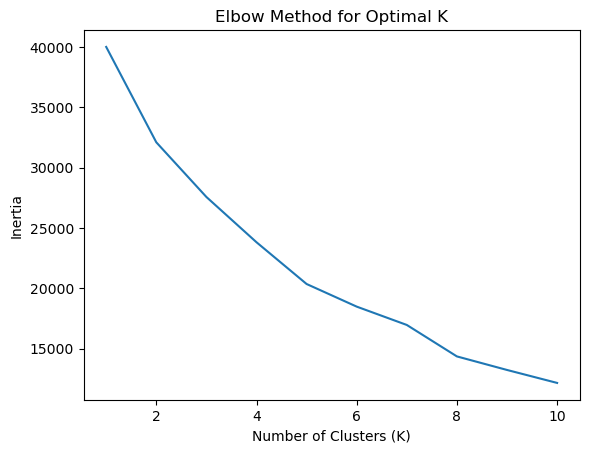

In [9]:
# Plot the Elbow curve
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Based on the Elbow curve, choose an optimal K (e.g., 4 in this case)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_
df['KMeans_Cluster'] = labels_kmeans #stores the cluster labels in the dataframe


In [35]:
# b) Hierarchical Clustering
# Experiment with different linkage criteria: 'ward', 'complete', 'average'
linkage_methods = ['ward', 'complete', 'average']
for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels_hierarchical = hierarchical.fit_predict(X_scaled)
    df[f'Hierarchical_Cluster_{linkage}'] = labels_hierarchical #stores cluster labels in df

# 3. Visualization

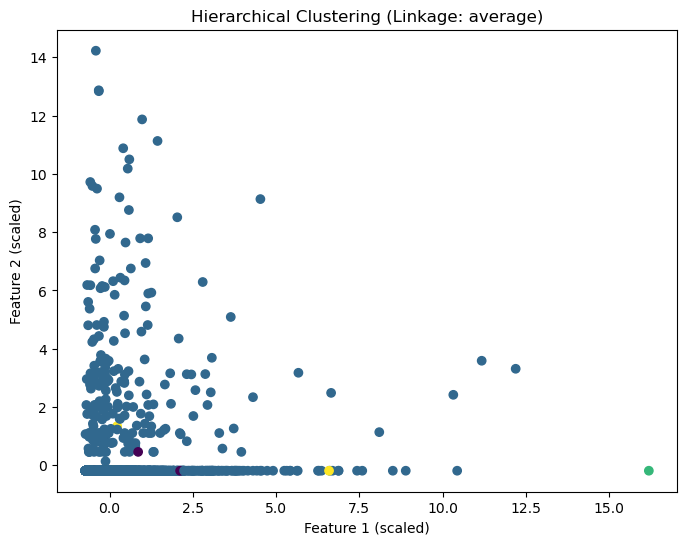

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_hierarchical, cmap='viridis')
plt.title(f'Hierarchical Clustering (Linkage: {linkage})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

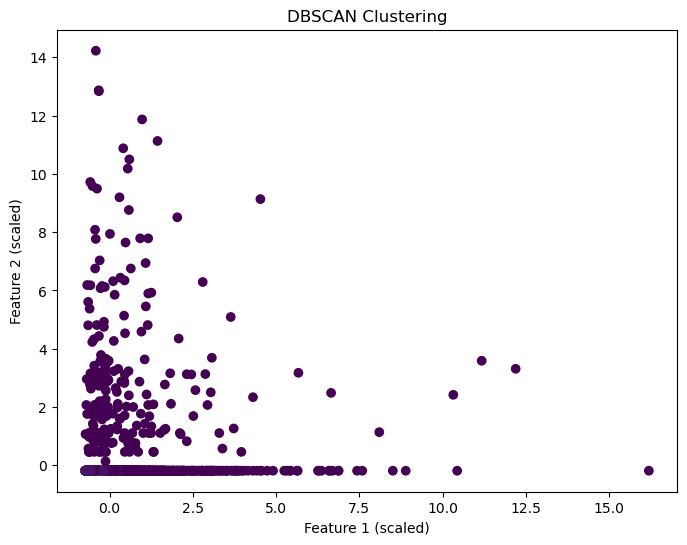

In [12]:
# c) DBSCAN
# Experiment with different epsilon and min_samples values
dbscan = DBSCAN(eps=0.3, min_samples=5)  # These are example parameters, you should adjust them.
labels_dbscan = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels_dbscan #store cluster labels

# 3. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

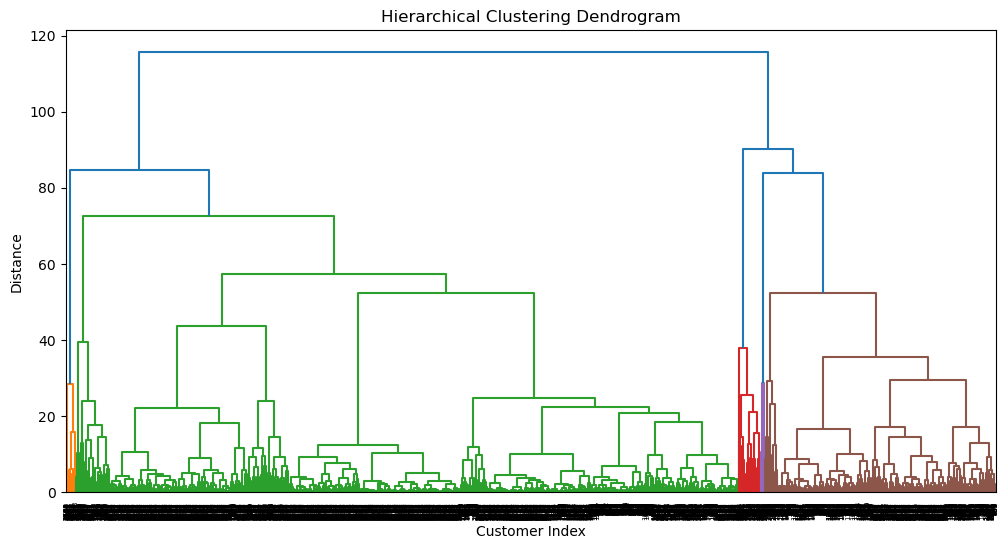

In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [14]:
# 4. Evaluation and Performance Metrics
# a) Silhouette Score for K-Means and DBSCAN
# Evaluate K-Means clustering
silhouette_avg_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans:.3f}")

# Evaluate DBSCAN clustering (if there are more than 1 cluster)
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")
else:
    print("DBSCAN resulted in a single cluster, silhouette score is not defined.")
    
# No silhouette score for Hierarchical as it needs a flat cluster.

Silhouette Score for K-Means: 0.332
Silhouette Score for DBSCAN: -0.436


In [15]:
# 5. Cluster Analysis and Interpretation
# This is where you would analyze the clusters based on your data.
#  Now it will be based on the actual data from the CSV file.

print("\nCluster Analysis and Interpretation:")
print("------------------------------------")

# Function to analyze and interpret clusters for K-Means
def analyze_kmeans_clusters(df, kmeans_labels, num_clusters, features):
    print("\nK-Means Clusters Analysis:")
    for cluster_num in range(num_clusters):
        print(f"\nCluster {cluster_num}:")
        cluster_data = df[kmeans_labels == cluster_num][features]  # Use the features list
        print(cluster_data.describe().to_string())  # Describe the cluster data
        # Additional interpretation logic can be added here, e.g., finding the cluster center

# Function to analyze clusters for DBSCAN
def analyze_dbscan_clusters(df, dbscan_labels, features):
    print("\nDBSCAN Clusters Analysis:")
    unique_labels = set(dbscan_labels)
    for cluster_label in unique_labels:
        print(f"\nCluster {cluster_label}:")
        if cluster_label == -1:
            print("  -1 represents noise points (outliers).")
            continue
        cluster_data = df[dbscan_labels == cluster_label][features]
        print(cluster_data.describe().to_string())

# Function to analyze clusters for Hierarchical
def analyze_hierarchical_clusters(df, hierarchical_labels, num_clusters, features, linkage_method):
    print(f"\nHierarchical Clusters Analysis (Linkage: {linkage_method}):")
    for cluster_num in range(num_clusters):
        print(f"\nCluster {cluster_num}:")
        cluster_data = df[hierarchical_labels == cluster_num][features]
        print(cluster_data.describe().to_string())

# Analyze the clusters
analyze_kmeans_clusters(df, kmeans.labels_, optimal_k, features)
analyze_dbscan_clusters(df, dbscan.labels_, features)
for linkage in linkage_methods:
    analyze_hierarchical_clusters(df, df[f'Hierarchical_Cluster_{linkage}'], 4, features, linkage)



Cluster Analysis and Interpretation:
------------------------------------

K-Means Clusters Analysis:

Cluster 0:
            Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll
count  1.350000e+03   1350.000000  1350.000000  1350.000000  1350.000000    1350.000000  1350.000000        1350.000000      1350.000000        1350.000000
mean   1.154471e+05    138.101481     3.677037     1.001481     1.001481   38140.517778    18.668889         319.595556         0.956296        4823.051852
std    1.146348e+05    785.575067     0.896078     0.038476     0.038476   26002.539239     6.851003         622.171738         1.777552        1878.539713
min    3.290000e+02      0.000000     1.000000     1.000000     1.000000    2500.000000     3.000000           0.000000         0.000000         486.000000
25%    4.907675e+04      0.000000     3.000000     1.000000     1.000000   20259.000000    14.000000     